In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Early Stage Diabetes Prediction**

About Data
This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

Features of the dataset
The dataset consist of total 15 features and one target variable named class.

1. Age: Age in years ranging from (20years to 65 years)
2. Gender: Male / Female
3. Polyuria: Yes / No
4. Polydipsia: Yes/ No
5. Sudden weight loss: Yes/ No
6. Weakness: Yes/ No
7. Polyphagia: Yes/ No
8. Genital Thrush: Yes/ No
9. Visual blurring: Yes/ No
10. Itching: Yes/ No
11. Irritability: Yes/No
12. Delayed healing: Yes/ No
13. Partial Paresis: Yes/ No
14. Muscle stiffness: yes/ No
15. Alopecia: Yes/ No
16. Obesity: Yes/ No

Class: Positive / Negative

# **Importing libraries**

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# **Importing Dataset**

In [3]:
df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# **EDA (Custome way)**

> **Dealing with missing values**

In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

> As we can see there is no missing value in the dataset

**Distribution of different attributes**

> **Distribution of target variable**

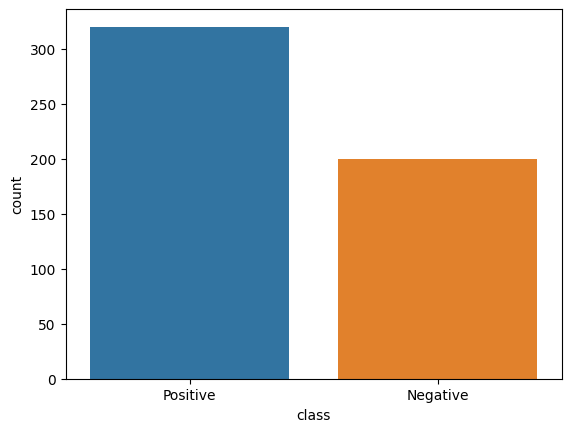

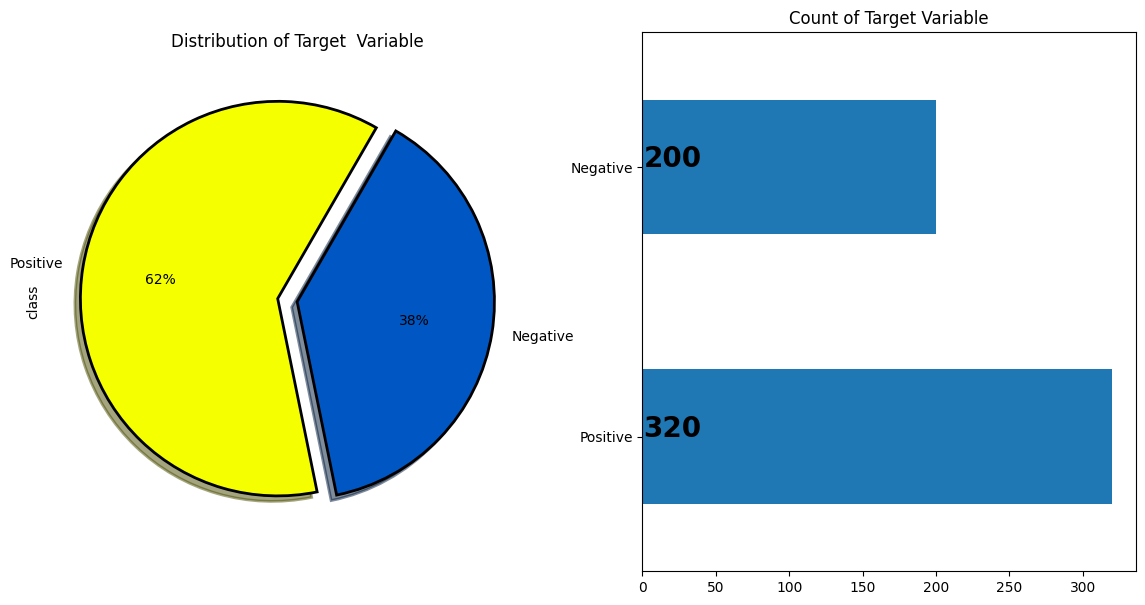

In [6]:

sns.countplot(x=df['class'],data=df)

# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  Variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target Variable")
plt.show()

> **Distribution of Gender**

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


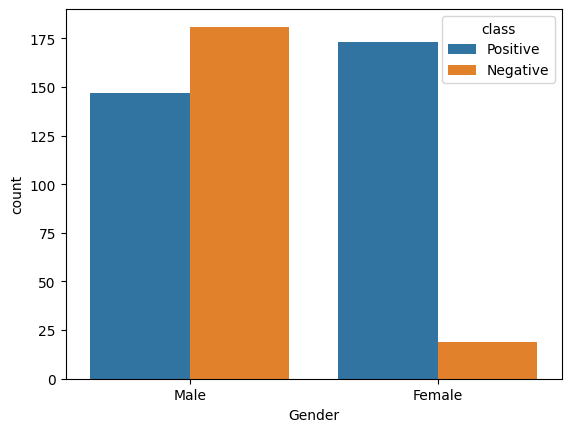

In [7]:
sns.countplot(x=df['Gender'],hue=df['class'], data=df)

plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Polyuria**

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


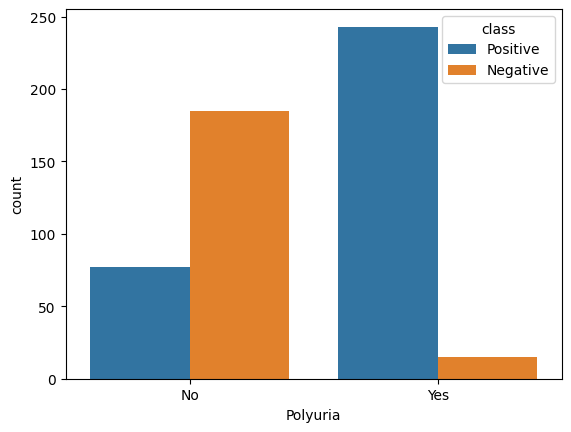

In [8]:
sns.countplot(x=df['Polyuria'],hue=df['class'], data=df)


plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of sudden weight loss**

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


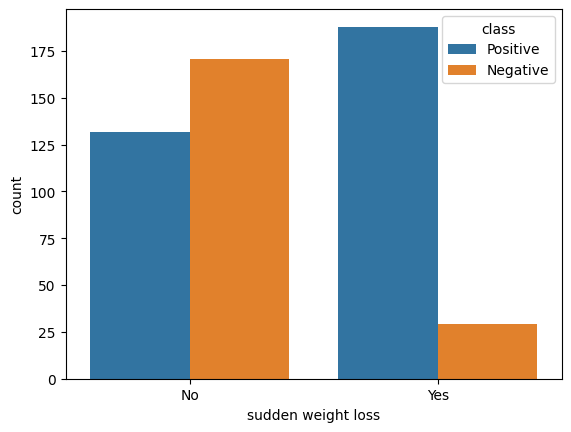

In [9]:
sns.countplot(x=df['sudden weight loss'], hue = df['class'], data = df)
plot_criteria = ['sudden weight loss','class']
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of weakness**

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


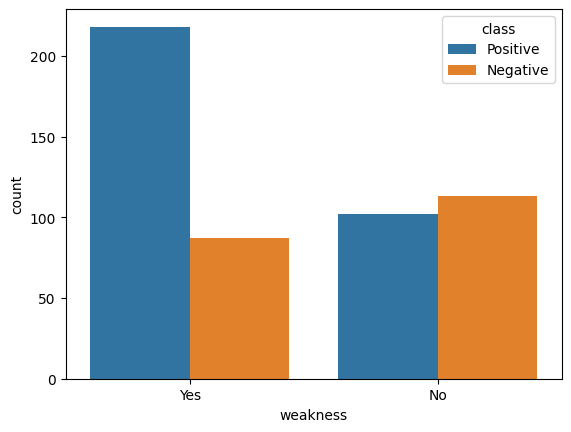

In [10]:
sns.countplot(x=df['weakness'],hue=df['class'], data=df)


plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Genital thrush**

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


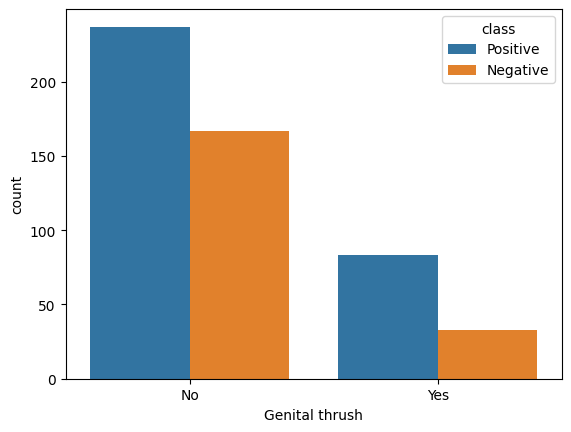

In [11]:
sns.countplot(x=df['Genital thrush'],hue=df['class'], data=df)


plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of visual blurring**

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


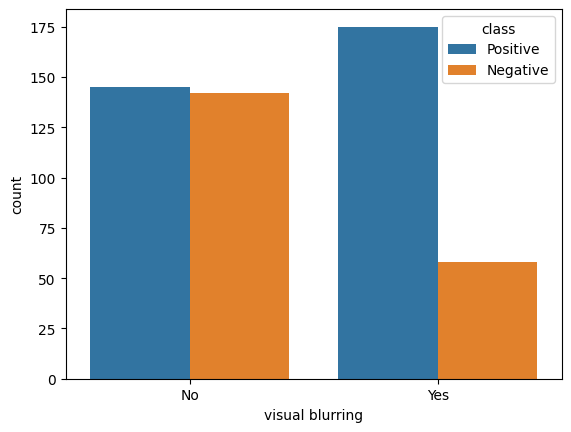

In [12]:
sns.countplot(x=df['visual blurring'],hue=df['class'], data=df)


plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Itching**

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


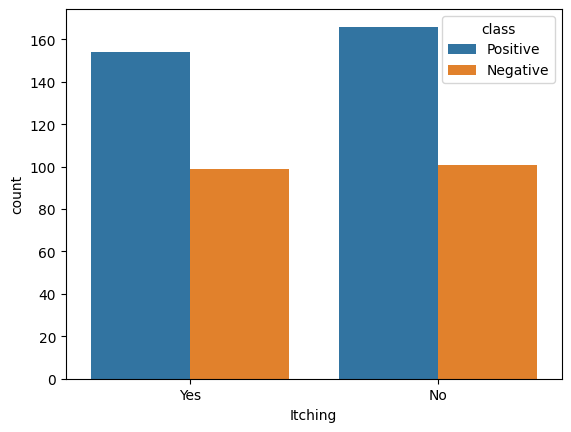

In [13]:
sns.countplot(x=df['Itching'],hue=df['class'], data=df)


plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Irritability**

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


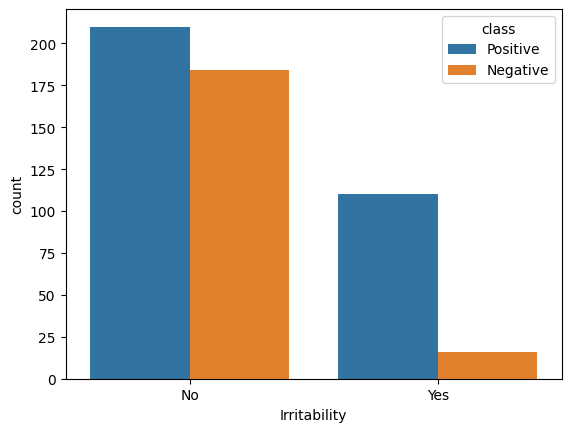

In [14]:
sns.countplot(x=df['Irritability'],hue=df['class'], data=df)


plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of delayed healing**

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


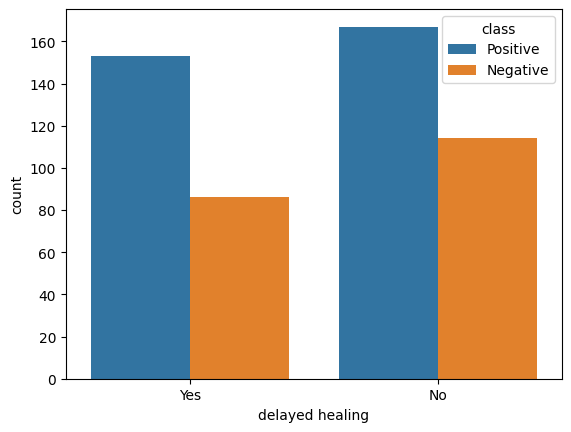

In [15]:
sns.countplot(x=df['delayed healing'],hue=df['class'], data=df)


plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of partial paresis**

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


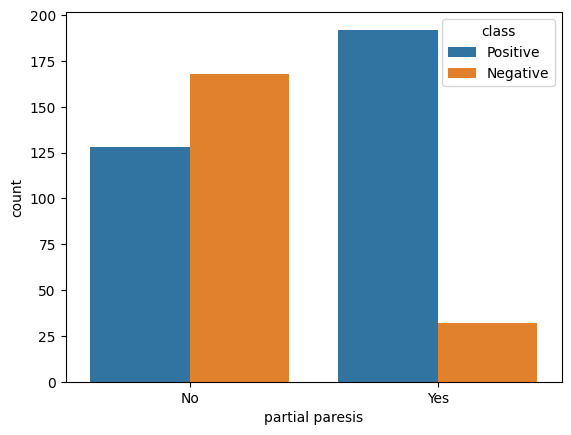

In [16]:
sns.countplot(x=df['partial paresis'],hue=df['class'], data=df)


plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of muscle stiffness**

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


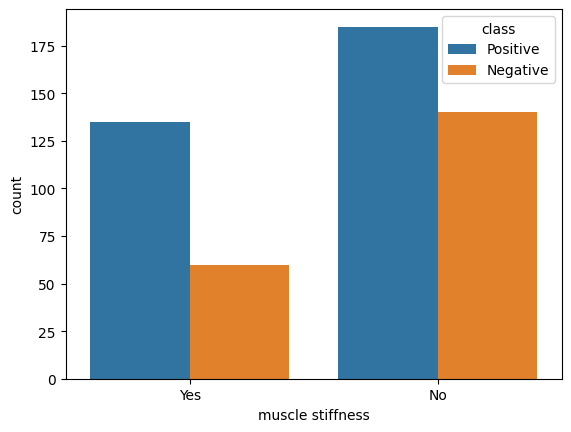

In [17]:
sns.countplot(x=df['muscle stiffness'],hue=df['class'], data=df)


plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Alopecia**

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


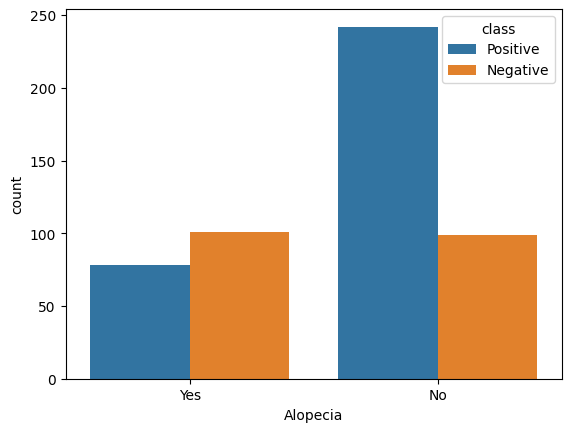

In [18]:
sns.countplot(x=df['Alopecia'],hue=df['class'], data=df)


plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

> **Distribution of Obesity**

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


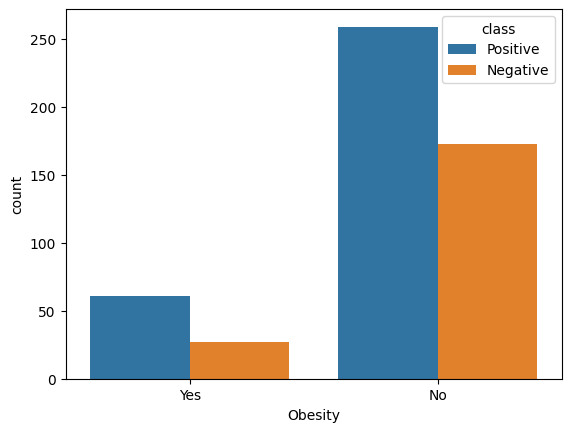

In [19]:
sns.countplot(x=df['Obesity'],hue=df['class'], data=df)


plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

# **Automated EDA using sweetviz and autoviz**

In [20]:
# pip install sweetviz

In [21]:
import sweetviz as sv

In [22]:
#create a object 
report=sv.analyze(df)

                                             |             | [  0%]   00:00 -> (? left)

**The output of sweetviz library is a html file. We need to provide a filename with html tag in show_html function.**

In [23]:
report.show_html("my_first_eda_sweetviz.html")

Report my_first_eda_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


> *If you are working on kaggle then you can download this file from kaggle output folder. After downloading this file you can run it on your browse*

> **EDA Using AutoViz**

In [24]:
# !pip install autoviz
# !pip install Django
# !pip install channels

In [25]:
# import autoviz
# from autoviz.AutoViz_Class import AutoViz_Class

In [26]:
#run this cell to understand autoviz class

# ?AutoViz_Class

In [27]:
# av=AutoViz_Class()

In [28]:
# autoviz_eda=av.AutoViz('diabetes_data.csv',verbose=0)

**EDA using Pandas Profiling**

In [29]:
import pandas as pd
from pandas_profiling import ProfileReport

In [30]:
design_report = ProfileReport(df)
design_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


(brave:64788): Gtk-WARNING **: 00:32:48.565: Theme parsing error: gtk.css:1413:23: 'font-feature-settings' is not a valid property name

(brave:64788): Gtk-WARNING **: 00:32:48.573: Theme parsing error: gtk.css:3286:25: 'font-feature-settings' is not a valid property name

(brave:64788): Gtk-WARNING **: 00:32:48.575: Theme parsing error: gtk.css:3748:23: 'font-feature-settings' is not a valid property name
Gtk-Message: 00:32:48.643: Failed to load module "canberra-gtk-module"
Gtk-Message: 00:32:48.647: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# df1=pd.read_html(io='report.html')

**I personally found pandas profiling more effective in this case****

# **Data pre processing**

> **Changing target values into numerical values , basically converting 'positive' to 1 and 'negative'  to 0**

In [32]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head(2)

0    1
1    1
Name: class, dtype: int64

> **Separating Target feature**

In [33]:

inp = df.drop(['class'], axis=1)
outp = df['class']

> **Storing Features**

In [34]:
objectList = inp.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


> **Label encoding using sklearn**

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    inp[feature] = le.fit_transform(inp[feature].astype(str))  

print (inp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


Here astype is used for casting the data type into int64

In [36]:
inp.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# **Correlation between features**

In [37]:
inp.corrwith(outp)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

> **Correlation with Response Variable class**

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

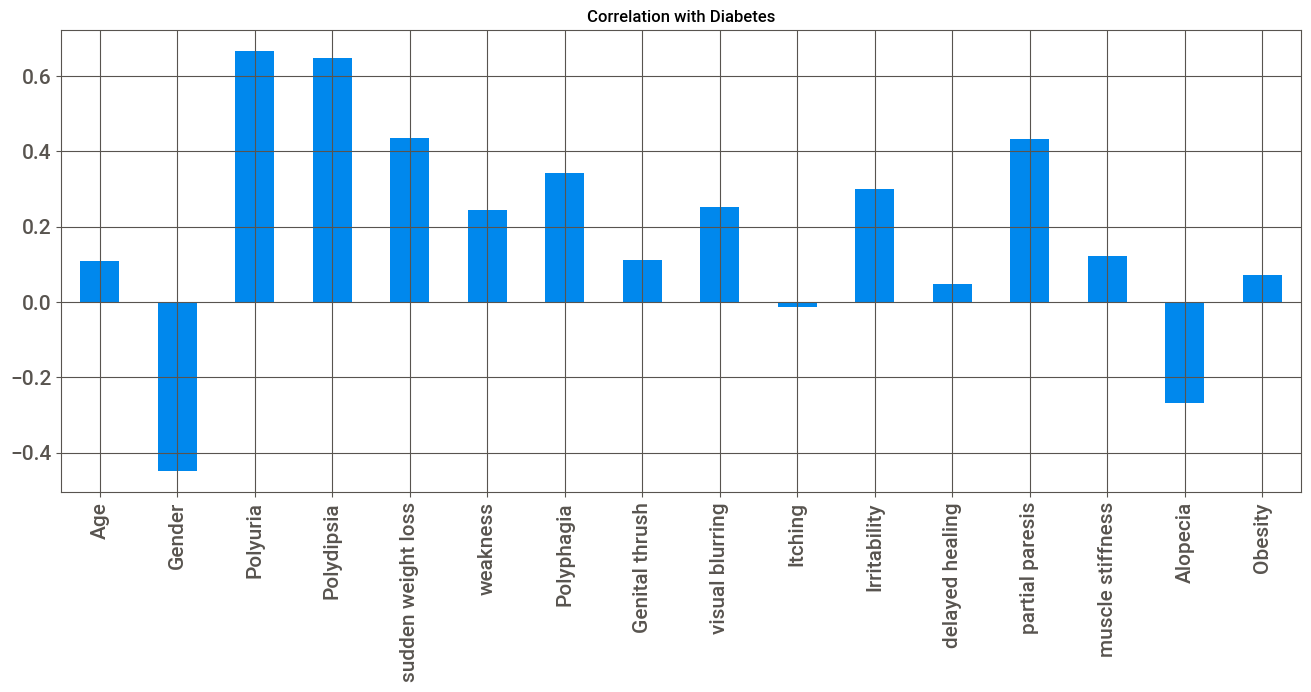

In [38]:
inp.corrwith(outp).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


# **Feature Selection**

In [39]:
inp.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

Best alpha using builtin lassocv %f 0.0006418639053254438
Best score using builtin lassocv 0.652283
Lasso picked 15variables and eliminated the other 1variables
Age                  -0.000537
Gender               -0.258130
Polyuria              0.319249
Polydipsia            0.279533
sudden weight loss    0.044944
weakness              0.021560
Polyphagia            0.041213
Genital thrush        0.173057
visual blurring       0.053579
Itching              -0.111312
Irritability          0.152045
delayed healing      -0.080602
partial paresis       0.063026
muscle stiffness     -0.018624
Alopecia             -0.000000
Obesity              -0.047056
dtype: float64


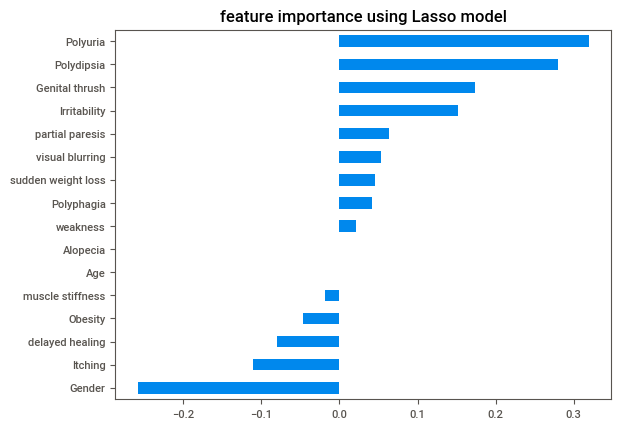

In [40]:
from sklearn.linear_model import LassoCV
import matplotlib as matplotlib
reg = LassoCV()
reg.fit(inp,outp)
print("Best alpha using builtin lassocv %f" ,reg.alpha_)
print("Best score using builtin lassocv %f" %reg.score(inp,outp))
coef = pd.Series(reg.coef_,index=inp.columns)
print("Lasso picked "+ str(sum(coef!=0))+ "variables and eliminated the other " + str(sum(coef==0)) + "variables" )
imp_coef = coef.sort_values()
# matplotlib.rcparams['figure.figsize'] =(8.0,10.0)
imp_coef.plot(kind="barh")
plt.title("feature importance using Lasso model")
print(coef)


In [41]:
inp.shape[1]

16

In [42]:
inp_FS = inp = inp.drop(['Alopecia'], axis=1)

In [43]:
inp_FS.shape[1]

15

In [44]:
inp_FS.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Obesity'],
      dtype='object')

In [45]:
l1 = list(inp.columns)
l2 = list(inp_FS.columns)

> **These features are not included in our model**

In [46]:
miss = []
for i in l1:
    if i not in l2:
        miss.append(i)
print(miss)

[]


# **Splitting into training and testing**

In [47]:
x_train, x_test, y_train,y_test = train_test_split(inp_FS,outp, test_size = 0.2, stratify = outp, random_state = 12345)

# **Data Normalization:**

Here we have used minmax normalization technique for normalizing the age attribute

In [48]:
minmax = MinMaxScaler()
x_train[['Age']] = minmax.fit_transform(x_train[['Age']])
x_test[['Age']] = minmax.transform(x_test[['Age']])

# **Model Building **
Let's jump into the interesting part which is building models and apply them in our dataset. We have applied the following models into our training sets:
1. Logistic Regression
2. 

# **Logistic Regression**

In [49]:
logic = LogisticRegression(random_state = 0,  penalty='l2')
logic.fit(x_train, y_train)

LogisticRegression(random_state=0)

# **k-Fold cross-validation**
k-Fold cross-validation is a technique that minimizes the disadvantages of the hold-out method. k-Fold introduces a new way of splitting the dataset which helps to overcome the “test only once bottleneck”.

The algorithm of the k-Fold technique:

Pick a number of folds – k. Usually, k is 5 or 10 but you can choose any number which is less than the dataset’s length.
Split the dataset into k equal (if possible) parts (they are called folds)
Choose k – 1 folds as the training set. The remaining fold will be the test set
Train the model on the training set. On each iteration of cross-validation, you must train a new model independently of the model trained on the previous iteration
Validate on the test set
Save the result of the validation
Repeat steps 3 – 6 k times. Each time use the remaining  fold as the test set. In the end, you should have validated the model on every fold that you have.
To get the final score average the results that you got on step 6.

![k-Fold cross validation](https://i0.wp.com/neptune.ai/wp-content/uploads/Cross-validation-k-fold.jpg?resize=525%2C525&ssl=1)

[Reference](https://neptune.ai/blog/cross-validation-in-machine-learning-how-to-do-it-right)

In [50]:
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_logis = cross_val_score(estimator=logic,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

# **Model evaluation (Logistic Regression) :**

In [51]:
# Model Evaluation
y_predict_logi = logic.predict(x_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logis.mean(), prec, rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.951923,0.915865,0.940299,0.984375,0.961832,0.942187


In [52]:
print(classification_report(y_predict_logi,y_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.98      0.94      0.96        67

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



# **Model evaluation (Random Forest) :**

In [53]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100,)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_rf = cross_val_score(estimator=rf
,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [55]:
# Model Evaluation
y_predict_r = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)

#results = results.drop(results.index[[1,9]], inplace=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.951923,0.915865,0.940299,0.984375,0.961832,0.942187
1,Random Forest,1.000000,0.973558,1.000000,1.000000,1.000000,1.000000


In [56]:
print(classification_report(y_predict_r,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



# **Model evaluation (SVM) :**

In [57]:
sv=SVC(kernel='linear',random_state=0)
sv.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [58]:
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_sv = cross_val_score(estimator=sv,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [59]:
# Model Evaluation
y_predict_svm = rf.predict(x_test)
roc=roc_auc_score(y_test, y_predict_svm)
acc = accuracy_score(y_test, y_predict_svm)
prec = precision_score(y_test, y_predict_svm)
rec = recall_score(y_test, y_predict_svm)
f1 = f1_score(y_test, y_predict_svm)

model_results = pd.DataFrame([['SVC',acc, acc_sv.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
#results.drop(results.index[len(results)-1])
#results = results.drop(results.index[[2]], inplace=True,axis =1)
results.head()

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.951923,0.915865,0.940299,0.984375,0.961832,0.942187
1,Random Forest,1.000000,0.973558,1.000000,1.000000,1.000000,1.000000
2,SVC,1.000000,0.913462,1.000000,1.000000,1.000000,1.000000


In [60]:
print(classification_report(y_predict_svm,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



# **Model evaluation (KNN) :**
We have tested with k values 1 to 10 to check which one is giving the best result

In [61]:
scores = []
dic = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i,metric='minkowski',p=2)  #minkowski and p = 2 ,euclidean distance
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    score = accuracy_score(predict, y_test)
    scores.append(round(100*score,2))
   # print(i)
    #print(score)

In [62]:
print(sorted(scores, reverse = True))

[99.04, 99.04, 98.08, 98.08, 97.12, 97.12, 97.12, 96.15, 96.15]


In [63]:
# Model Evaluation
knn = KNeighborsClassifier(n_neighbors = 1,metric='minkowski',p=2)  #minkowski and p = 2 ,euclidean distance
knn.fit(x_train,y_train)
predict = knn.predict(x_test)
score = accuracy_score(predict, y_test)

#y_predict_svm = rf.predict(x_test)
#roc=roc_auc_score(y_test, y_predict_svm)
#acc = accuracy_score(y_test, y_predict_svm)
prec = precision_score(y_test, predict)
rec = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)


kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_knn = cross_val_score(estimator=knn,X = x_train,y =y_train, cv = kfold,scoring='accuracy')


model_results = pd.DataFrame([['KNN',score, acc_knn.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
#results.drop(results.index[len(results)-1])
#results = results.drop(results.index[[3,5]], inplace=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.951923,0.915865,0.940299,0.984375,0.961832,0.942187
1,Random Forest,1.000000,0.973558,1.000000,1.000000,1.000000,1.000000
2,SVC,1.000000,0.913462,1.000000,1.000000,1.000000,1.000000
3,KNN,0.990385,0.959135,0.984615,1.000000,0.992248,1.000000


# **Model evaluation (Naive bayes-Gaussian NB) :**

In [64]:
gb=GaussianNB()
gb.fit(x_train,y_train)


GaussianNB()

In [65]:
kfold = model_selection.KFold(n_splits=8, random_state=7,shuffle = True)

acc_gb = cross_val_score(estimator=gb,X = x_train,y =y_train, cv = kfold,scoring='accuracy')

In [66]:
# Model Evaluation
y_predict_gb = gb.predict(x_test)
roc=roc_auc_score(y_test, y_predict_gb)
acc = accuracy_score(y_test, y_predict_gb)
prec = precision_score(y_test, y_predict_gb)
rec = recall_score(y_test, y_predict_gb)
f1 = f1_score(y_test, y_predict_gb)

model_results = pd.DataFrame([['GB',acc, acc_gb.mean(),prec,rec, f1,roc]], columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results = results.append(model_results, ignore_index = True)
#results.drop(results.index[len(results)-1])
#results = results.drop(results.index[[2]], inplace=True,axis =1)
results.head()

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.951923,0.915865,0.940299,0.984375,0.961832,0.942187
1,Random Forest,1.000000,0.973558,1.000000,1.000000,1.000000,1.000000
2,SVC,1.000000,0.913462,1.000000,1.000000,1.000000,1.000000
3,KNN,0.990385,0.959135,0.984615,1.000000,0.992248,1.000000
4,GB,0.884615,0.882212,0.861111,0.968750,0.911765,0.859375


In [67]:
# export models
import joblib
filename = "logic.joblib"
joblib.dump(logic, filename)
filename = "rf.joblib"
joblib.dump(rf, filename)
filename = "sv.joblib"
joblib.dump(sv, filename)
filename = "knn.joblib"
joblib.dump(knn, filename)
filename = "gb.joblib"
joblib.dump(gb, filename)

['gb.joblib']